# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

# Data

In [3]:
london_crime = pd.read_csv("london_crime_by_lsoa.csv") #import data
london_crime.head() #5 data pertama pada dataframe london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
london_crime.tail() #5 data terakhir pada dataframe london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
london_crime.info() #informasi tentang data type masing-masing kolom pada dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
london_crime.shape #(jumlah baris, kolom)

(13490604, 7)

In [7]:
print("Jumlah borough yang tercatat:", london_crime["borough"].nunique())
print(london_crime["borough"].unique())

Jumlah borough yang tercatat: 33
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


In [8]:
print("Jumlah kriminal kategori mayor yang tercatat:", london_crime["major_category"].nunique())
print(london_crime["major_category"].unique())

Jumlah kriminal kategori mayor yang tercatat: 9
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [9]:
london_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

# Area Plot

---
#### Wilayah mana yang memiliki angka kejahatan/kriminal yang paling besar selama tahun 2008-2016?

In [10]:
london_crime = pd.read_csv("london_crime_by_lsoa.csv")

In [11]:
top5_crime = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
top5_crime = top5_crime.set_index("year").groupby("borough").sum()
top5_crime = top5_crime.sort_values(by="value", ascending=False).head(5)
top5_crime

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [12]:
df_top5 = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_top5 = df_top5.loc[top5_crime.index]
df_top5 = pd.pivot_table(df_top5, values="value", aggfunc=np.sum, index="year", columns="borough")
df_top5

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9036\3377554723.py:3: FutureWarning: The provided callable <function sum at 0x00000219FFCFC0E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_top5 = pd.pivot_table(df_top5, values="value", aggfunc=np.sum, index="year", columns="borough")


borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


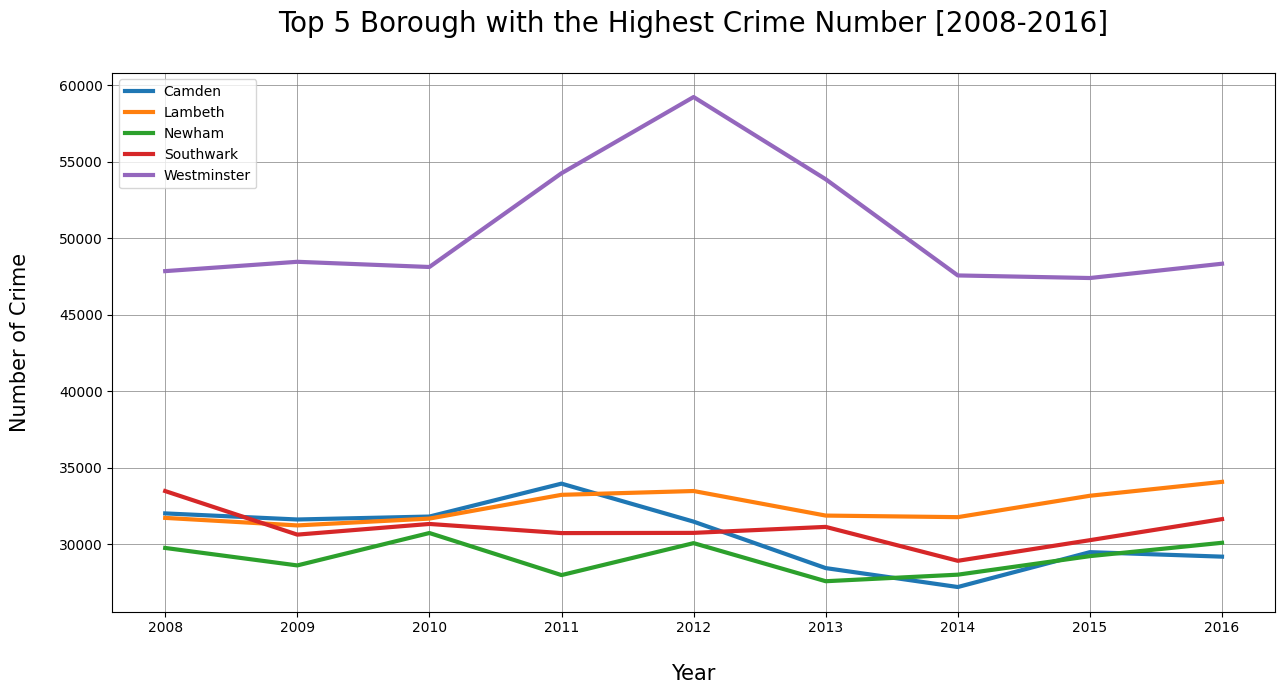

In [13]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_top5.plot(kind="line",
             figsize=(15,7),
            linewidth=3)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

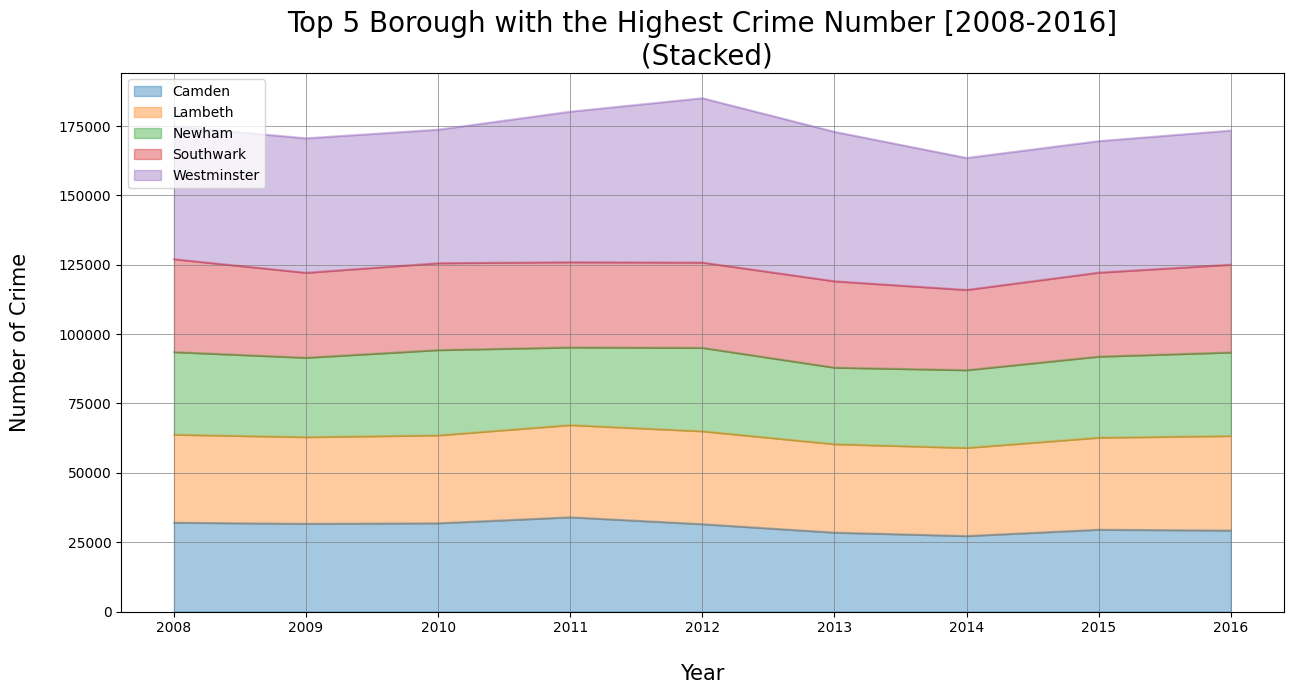

In [14]:
#STACKED AREA PLOT
df_top5.plot(kind="area",
             figsize=(15,7),
             stacked=True,
             alpha = 0.4)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n (Stacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

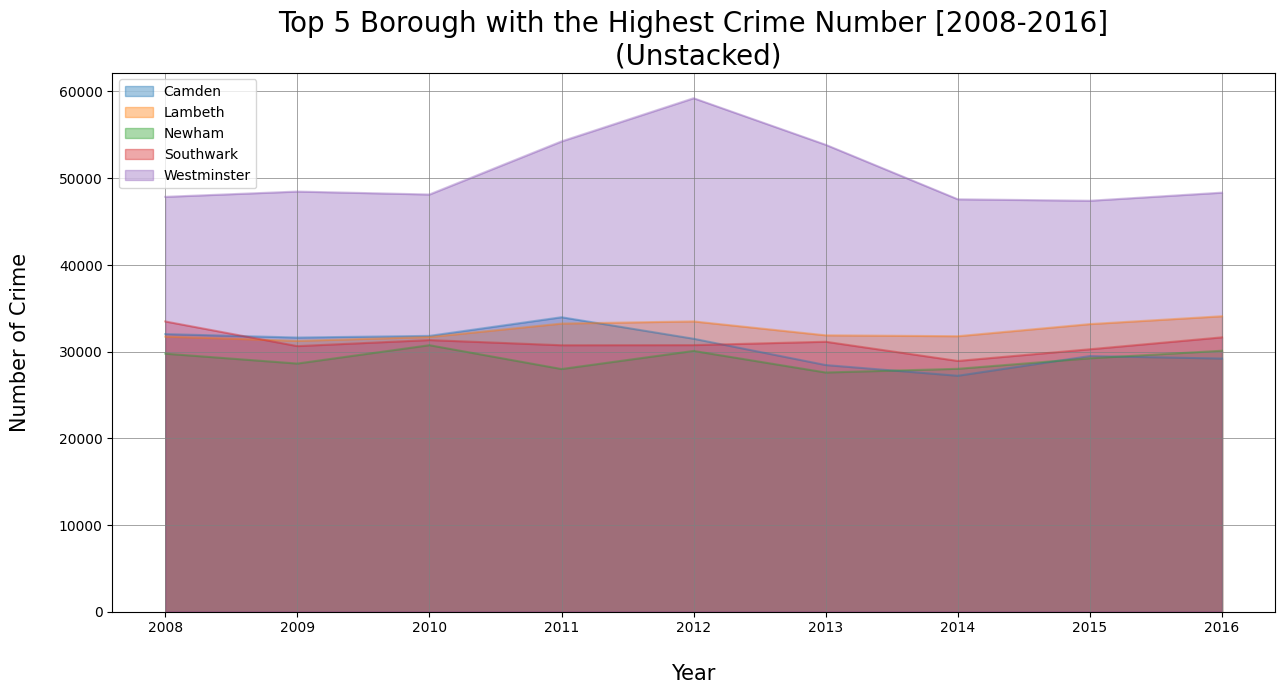

In [15]:
#UNSTACKED AREA PLOT
df_top5.plot(kind="area",
             figsize=(15,7),
             stacked=False,
             alpha = 0.4)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n (Unstacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Diketahui bahwa Westminster memiliki angka kejahatan/kriminal tertinggi dari tahun 2008-2016, diikuti dengan Lambeth, Southwark, Camden, dan Newham.  

---
#### Question: Wilayah metropolitan London/_borough_ mana yang memiliki angka kejahatan/kriminal yang paling rendah selama tahun 2008-2016?

In [16]:
least5_crime = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
least5_crime = least5_crime.set_index("year").groupby("borough").sum()
least5_crime = least5_crime.sort_values(by="value", ascending=True).head(5)
least5_crime

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136


In [17]:
df_least5 = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_least5 = df_least5.loc[least5_crime.index]
df_least5 = pd.pivot_table(df_least5, values="value", aggfunc=np.sum, index="year", columns="borough")
df_least5

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9036\3606121803.py:3: FutureWarning: The provided callable <function sum at 0x00000219FFCFC0E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_least5 = pd.pivot_table(df_least5, values="value", aggfunc=np.sum, index="year", columns="borough")


borough,Bexley,City of London,Kingston upon Thames,Richmond upon Thames,Sutton
year,,,,,
2008,15305,0,10661,11106,12943
2009,14445,0,10163,10618,12240
2010,13166,0,10171,10601,12032
2011,11325,69,10155,10896,11068
2012,11669,157,9956,11168,10948
2013,11552,110,9191,10439,10057
2014,11844,115,9288,10456,10443
2015,11990,151,9738,10413,10598
2016,12840,178,9983,11074,10658


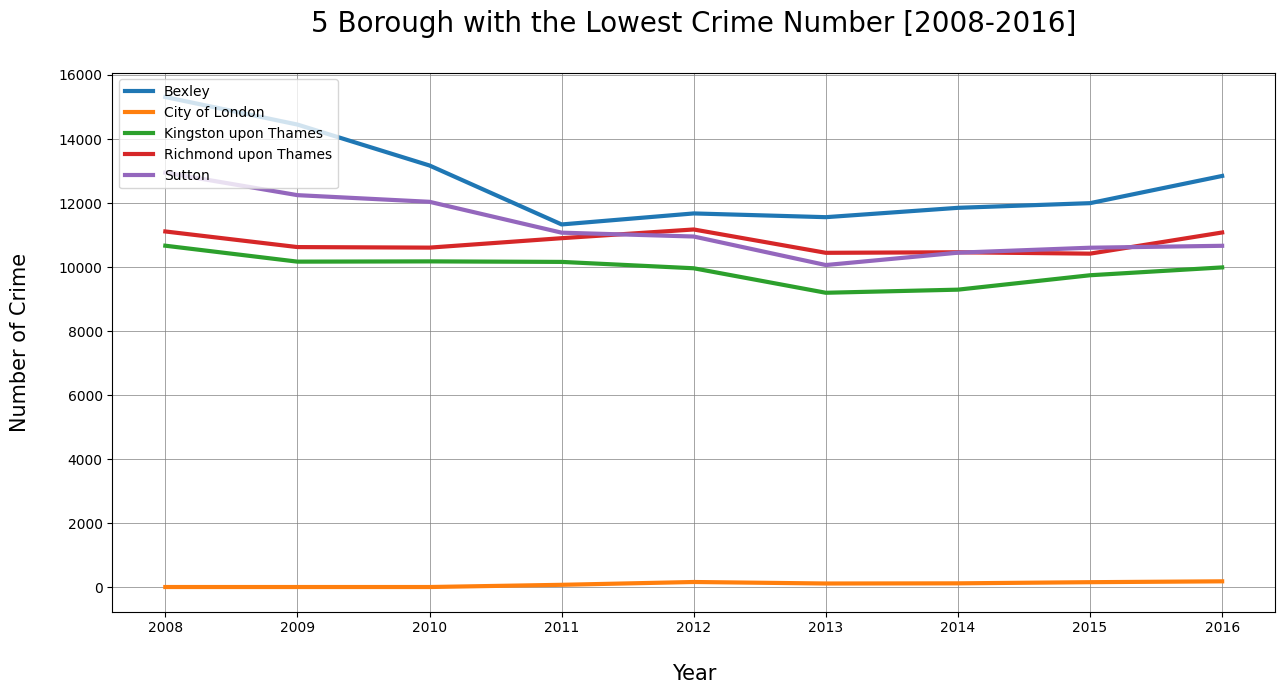

In [18]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_least5.plot(kind="line",
             figsize=(15,7),
            linewidth=3)
plt.title("5 Borough with the Lowest Crime Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

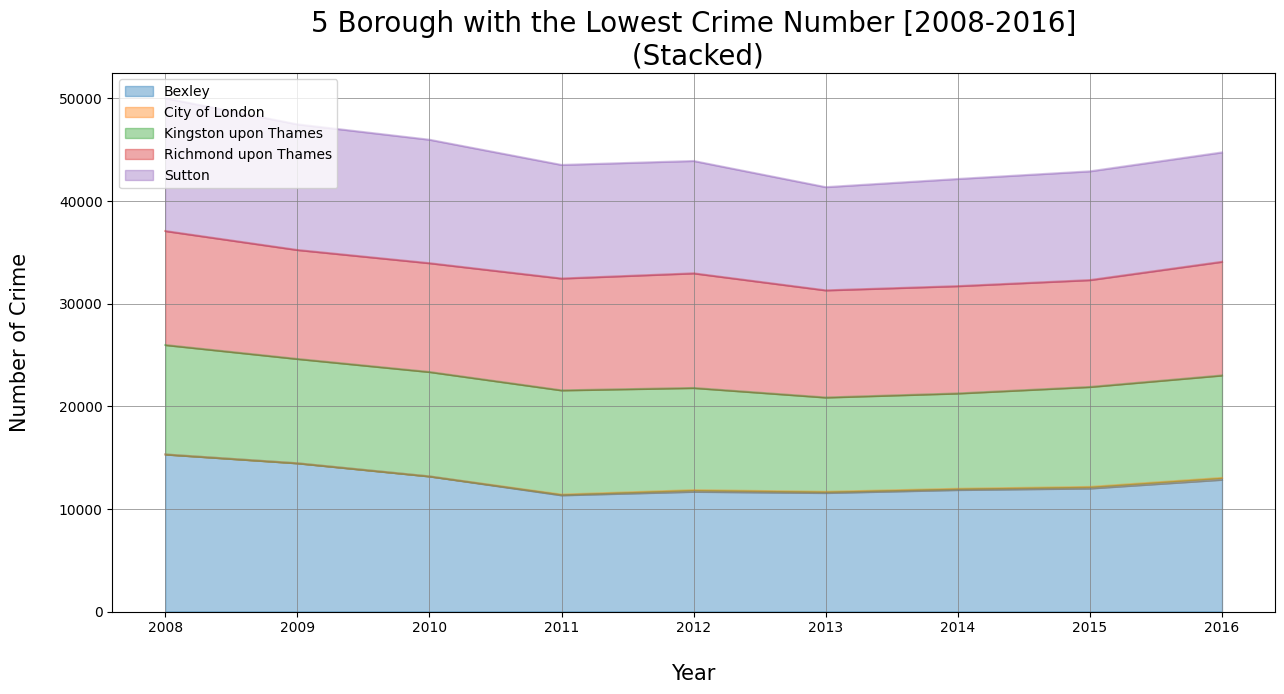

In [19]:
#STACKED AREA PLOT
df_least5.plot(kind="area",
             figsize=(15,7),
             stacked=True,
             alpha = 0.4)
plt.title("5 Borough with the Lowest Crime Number [2008-2016]\n (Stacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

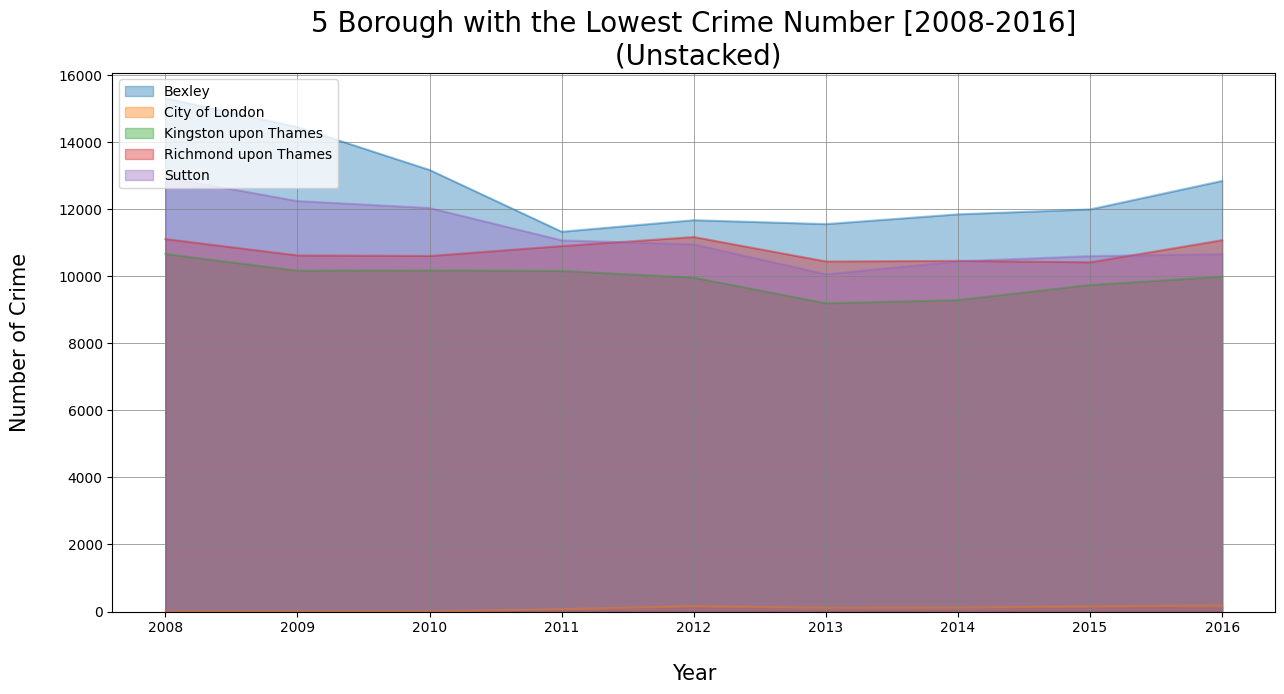

In [20]:
#UNSTACKED AREA PLOT
df_least5.plot(kind="area",
             figsize=(15,7),
             stacked=False,
             alpha = 0.4)
plt.title("5 Borough with the Lowest Crime Number [2008-2016]\n (Unstacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Diketahui bahwa City of London adalah wilayah metropolitan/_borough_ yang memiliki angka kejahatan/kriminal yang paling rendah di tahun 2008-2016 dan diikuti dengan Bexley, Kingston upon Thames, Richmon upon Thames, dan Sutton.

# Histogram
---
#### Bagaimana distribusi frekuensi jumlah kejahatan/kriminal tahun 2008-2016?

In [21]:
year_frequency = london_crime.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
year_frequency = year_frequency.groupby("year").sum()
year_frequency

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Tabel di atas adalah tabel jumlah kejahatan/kriminal selama tahun 2008-2016.

In [22]:
count, bin_edges = np.histogram(year_frequency)
print(count)
print(bin_edges)

[1 1 0 0 0 1 2 1 0 3]
[680183.  686028.8 691874.6 697720.4 703566.2 709412.  715257.8 721103.6
 726949.4 732795.2 738641. ]


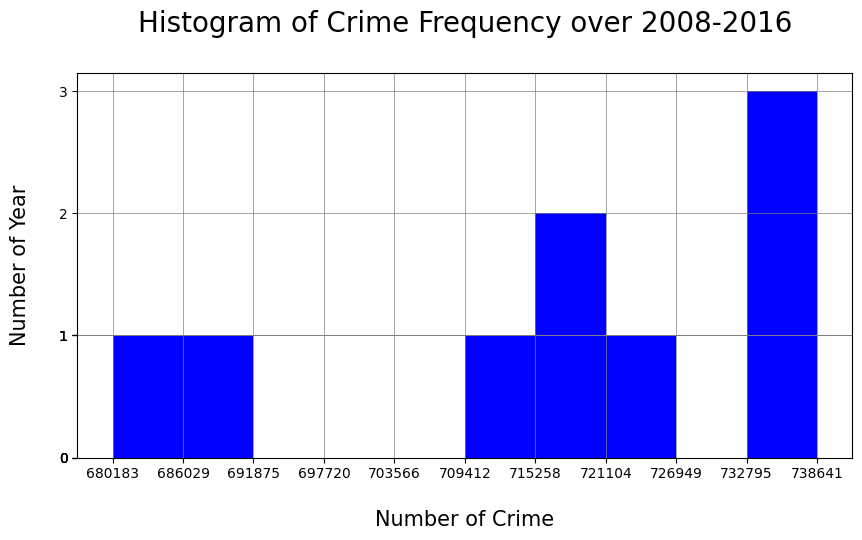

In [23]:
year_frequency.plot(kind="hist",
                     figsize=(10,5),
                     xticks=bin_edges,
                     yticks=count,
                     legend=False,
                     color="blue")
plt.title("Histogram of Crime Frequency over 2008-2016\n", fontsize=20)
plt.xlabel("\nNumber of Crime", fontsize=15)
plt.ylabel("Number of Year\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Dari histogram di atas, diketahui bahwa jumlah kejahatan/kriminal berkisar 732795 sampai 738641 memiliki frekuensi tertinggi yaitu 3. Artinya, selama 3 tahun dari 2008-2016, jumlah kejahatan/kriminal di seluruh wilayah berjumlah 732795 sampai 738641. Secara keseluruhan, selama tahun 2008-2016, jumlah kejahatan/kriminal paling rendah adalah 680183 dan tertinggi 738641.

# Bar Chart
---
#### Berapa jumlah kejahatan/kriminal di London berdasarkan kategori mayor tahun 2008-2016?

In [24]:
totalCrimeEachType = london_crime.drop(["lsoa_code","borough","minor_category","year","month"], axis=1).groupby("major_category").sum()
totalCrimeEachType["value"].to_numpy()
totalCrimeEachType

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


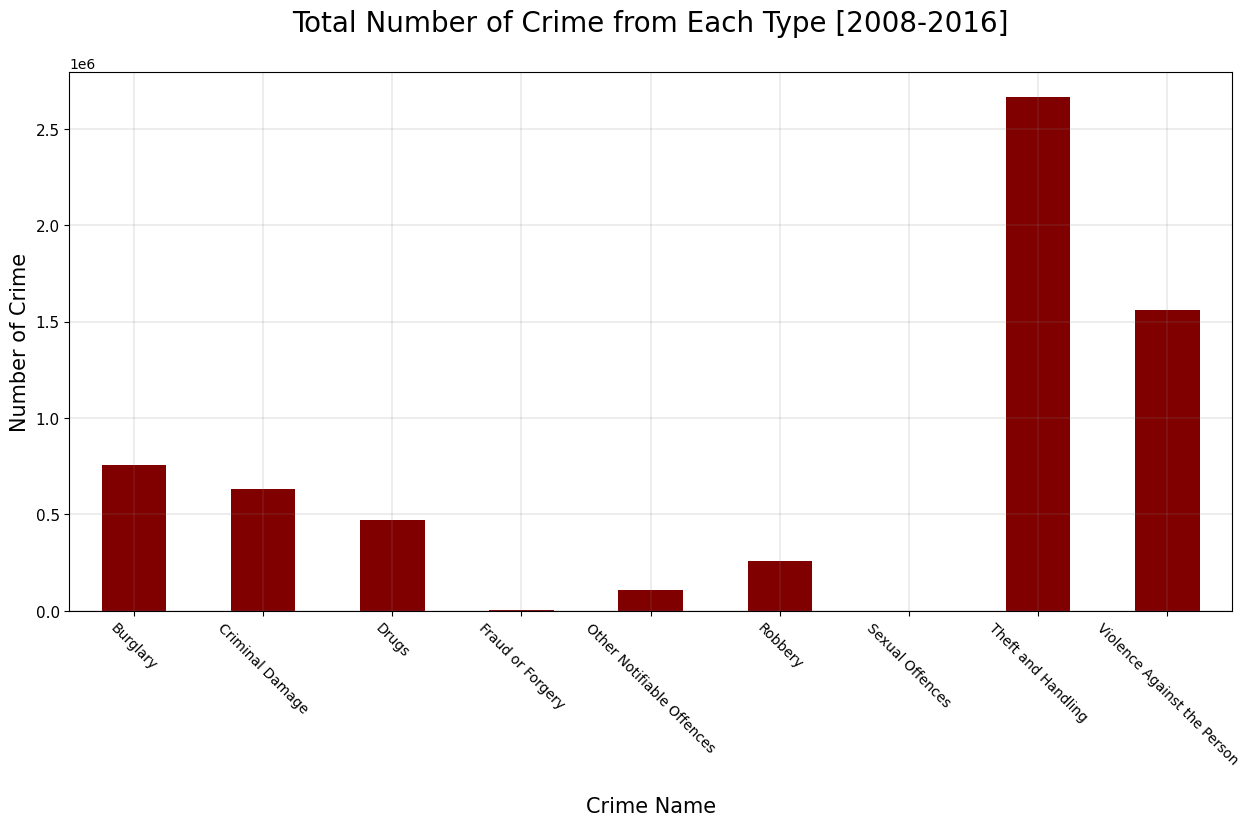

In [25]:
totalCrimeEachType.plot(kind="bar",
                        figsize=(15,7),
                        legend=False,
                        color="maroon")
plt.title("Total Number of Crime from Each Type [2008-2016]\n", fontsize=20)
plt.xlabel("\nCrime Name", fontsize=15)
plt.ylabel("Number of Crime", fontsize=15)
plt.xticks(rotation=-45)
plt.yticks(fontsize=11)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Diketahui bahwa Theft and Handling adalah kategori kejahatan/kriminal yang mempunyai jumlah kasus paling tinggi tahun 2008-2016 diikuti dengan Violance Against the Person. Selain itu, Fraud or Forgery dan Sexual Offences adalah kategori kejahatan/kriminal yang memiliki jumlah kasus terendah.

# Pie Chart
---
#### Bagaimana proporsi kategori kejahatan/kriminal di wilayah tertentu dari tahun 2008-2016?

In [26]:
redbridge_crime_proportion = london_crime.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
redbridge_crime_proportion = redbridge_crime_proportion.loc["Hillingdon"]
redbridge_crime_proportion = redbridge_crime_proportion.groupby("major_category").size()
redbridge_crime_proportion

major_category
Burglary                        34776
Criminal Damage                 68580
Drugs                           37584
Fraud or Forgery                 8640
Other Notifiable Offences       23112
Robbery                         29808
Sexual Offences                  3564
Theft and Handling             132084
Violence Against the Person    104436
dtype: int64

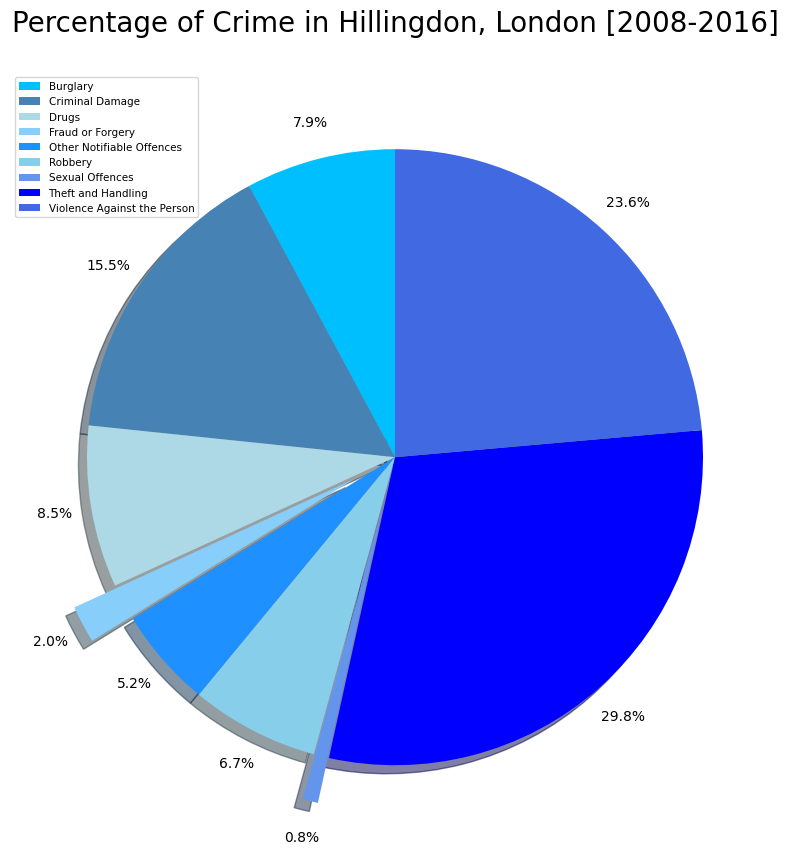

In [27]:
explode_list = [0,0,0,0.15,0,0,0.15,0,0]
color_list = ["deepskyblue","steelblue","lightblue","lightskyblue","dodgerblue",
             "skyblue","cornflowerblue","blue","royalblue"]
redbridge_crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     colors=color_list,
                    explode = explode_list,
                               subplots=True)
plt.title("Percentage of Crime in Hillingdon, London [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=redbridge_crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Berdasarkan grafik di atas, diketahui bahwa persentase tertinggi kategori kejahatan/kriminal di Hillingdon tahun 2008-2016 adalah Theft and Handling yaitu sebesar 29.8% dan persentase terendah adalah Sexual Offences 0.8%. Misal kita ingin mengetahui juga bagaimana proporsi kejahatan di wilayah City of London, yaitu sebagai berikut:

In [28]:
city_crime_proportion = london_crime.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
city_crime_proportion = city_crime_proportion.loc["City of London"]
city_crime_proportion = city_crime_proportion.groupby("major_category").size()
city_crime_proportion

major_category
Burglary                        540
Criminal Damage                1188
Drugs                           756
Other Notifiable Offences       432
Robbery                         540
Theft and Handling             3564
Violence Against the Person    2700
dtype: int64

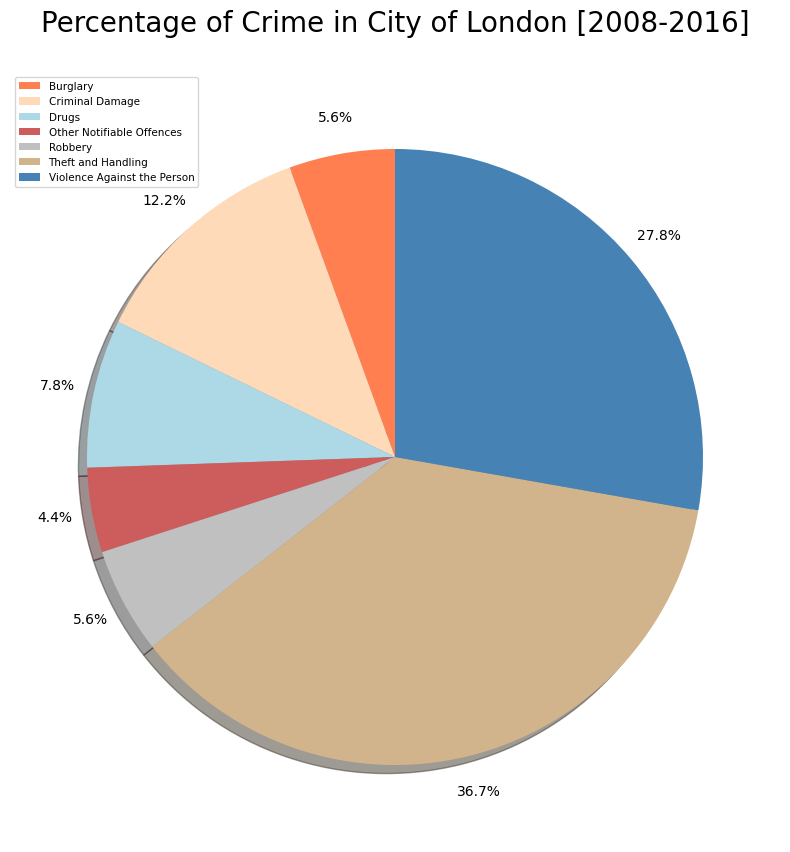

In [29]:
color_list = ["coral","peachpuff","lightblue","indianred","silver",
             "tan","steelblue","brown","rosybrown"]
city_crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     colors=color_list,
                               subplots=True)
plt.title("Percentage of Crime in City of London [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=city_crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Di wilayah City of London tidak terdapat kasus Sexual Offences dan Fraud or Forgery. Selain itu, persentase kejahatan/kriminal di London yang tertinggi masih tetap Theft and Handling yaitu sebesar 36.7% selama 2008-2016.

# Box Plot
---
#### Bagaimana distribusi statistik dari data jumlah kasus kejahatan/kriminal di masing-masing wilayah pada tahun 2008-2016?

In [30]:
crime_frequency = london_crime.drop(["lsoa_code","major_category","minor_category","month","year"], axis=1)
crime_frequency = crime_frequency.groupby("borough").sum()
crime_frequency

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [31]:
crime_frequency.describe()

,value
count,33.000000
mean,195386.606061
std,79148.057551
min,780.000000
25%,149447.000000
50%,203879.000000
75%,228613.000000
max,455028.000000


Tabel jumlah kasus kejahatan/kriminal di masing-masing wilayah di London tahun 2008-2016.

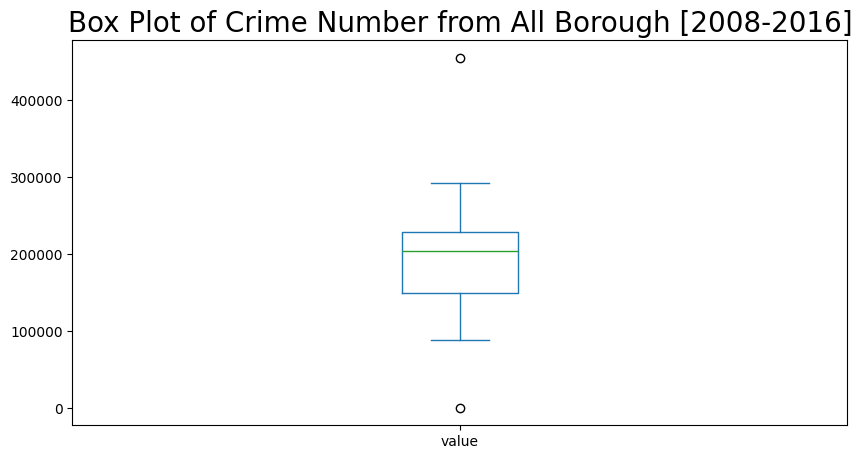

In [32]:
crime_frequency.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from All Borough [2008-2016]", fontsize=20)
plt.show()

Diketahui Jumlah kriminal/kejahatan di London terdapat dua titik _outlier_ yang berarti terdapat dua wilayah yang jauh lebih besar/kecil dari data yang lain. Dan diketahui Westminster adalah wilayah yang jumlah kasus kejahatan/kriminalnya jauh lebih tinggi dan City of London adalah wilayah yang jumlah kasus kejahatan/kriminalnya jauh lebih rendah. Jumlah kasus kejahatan di semua wilayah di London memiliki nilai minimum di sekitar 100000 dan maksimum di sekitar 300000.

# Scatterplot
---
#### Pada bulan apa jumlah kejahatan/kriminal di London mencapai angka tertinggi selama tahun 2008-2016?

In [33]:
month_crime = london_crime.drop(["lsoa_code","borough","major_category","minor_category","year"], axis=1)
month_crime = month_crime.groupby("month").sum()
month_crime = month_crime.reset_index()
month_crime

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


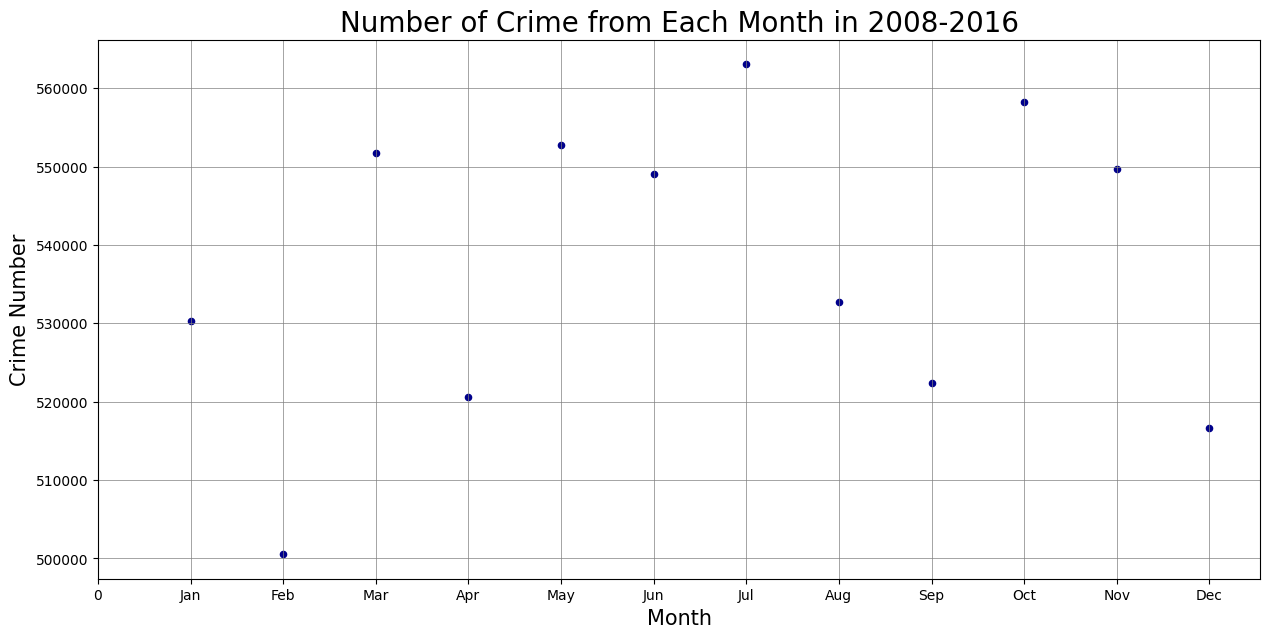

In [34]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime.plot(kind="scatter", x="month",y="value",figsize=(15,7), color="darkblue")
plt.title("Number of Crime from Each Month in 2008-2016", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Kasus kejahatan/kriminal di London yang paling tinggi adalah bulan Juli dan yang paling rendah adalah bulan Februari.

### Kita juga dapat melihat di tahun 2010, bulan apa jumlah kasus kejahatan/kriminal di London mencapai angka tertinggi.

In [35]:
london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [36]:
month_crime2010 = london_crime.drop(["lsoa_code","borough","major_category","minor_category"], axis=1).set_index("year")
month_crime2010 = month_crime2010.loc[2010]
month_crime2010 = month_crime2010.reset_index().drop("year", axis=1)
month_crime2010 = month_crime2010.groupby("month").sum()
month_crime2010 = month_crime2010.reset_index()
month_crime2010

,month,value
0,1,54934
1,2,55069
2,3,63629
3,4,60085
4,5,62126
5,6,62632
6,7,63764
7,8,59040
8,9,59731
9,10,62113


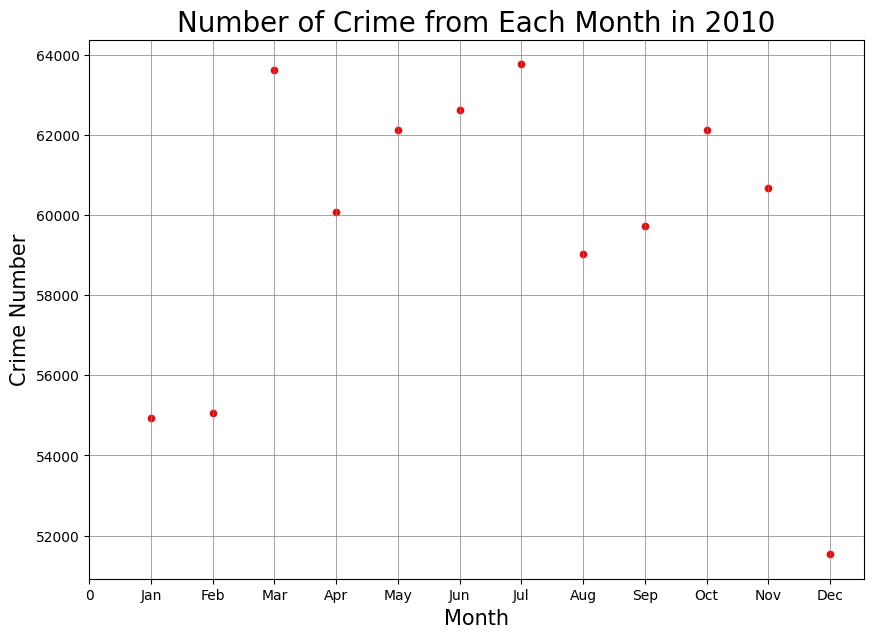

In [37]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime2010.plot(kind="scatter", x="month",y="value",figsize=(10,7), color="red")
plt.title("Number of Crime from Each Month in 2010", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Pada tahun 2008, jumlah kasus kejahatan/kriminal mencapai angka tertinggi di bulan Maret dan Juli dan angka terendah di bulan Desember.

# Follium Maps
---
Folium memudahkan untuk memvisualisasikan data yang dapat dimanipulasi dalam environment Python di atas sebuah peta leaflet. Folium memberikan kemampuan untuk mengikat data ke peta untuk visualisasi choropleth dan juga memberikan kemampuan visualisasi vektor/raster/html sebagai sebuah penanda di atas peta.

In [38]:
london_crime = pd.read_csv("london_crime_by_lsoa.csv")

In [39]:
#Peta London
m = folium.Map(location=[51.507351, -0.127758], zoom_start=15)
m